### Dataset
The dataset used here is NIPS Papers dataset from Kaggle.
Only the id, year, title || ' ' || abstract as abstract have been used here.

In [1]:
import pandas

dataset = pandas.read_csv('../nips-papers/papers_modified.csv', delimiter=',')
dataset.head()

,id,year,abstract
0,1861,2000,Algorithms for Non-negative Matrix Factorizati...
1,1975,2001,Characterizing Neural Gain Control using Spike...
2,3163,2007,Competition Adds Complexity It is known that d...
3,3164,2007,Efficient Principled Learning of Thin Junction...
4,3167,2007,Regularized Boost for Semi-Supervised Learning...


In [2]:
# Wordcount of each abstract
dataset['word_count'] = dataset['abstract'].apply(lambda x: len(str(x).split(" ")))
dataset.head()

,id,year,abstract,word_count
0,1861,2000,Algorithms for Non-negative Matrix Factorizati...,112
1,1975,2001,Characterizing Neural Gain Control using Spike...,88
2,3163,2007,Competition Adds Complexity It is known that d...,70
3,3164,2007,Efficient Principled Learning of Thin Junction...,150
4,3167,2007,Regularized Boost for Semi-Supervised Learning...,124


In [3]:
# Statistics related to word count
dataset.word_count.describe()

count    3924.000000
mean      155.888124
std        46.001025
min        27.000000
25%       122.000000
50%       151.000000
75%       185.000000
max       325.000000
Name: word_count, dtype: float64

In [4]:
# Common words
freq = pandas.Series(' '.join(dataset['abstract']).split()).value_counts()[:20]
freq

the         30107
of          21685
a           16518
and         14218
to          13104
in           9454
for          8382
that         7841
is           7687
We           6239
on           5704
we           5167
with         5142
as           3686
this         3677
are          3546
an           3398
by           3302
can          2958
learning     2903
dtype: int64

In [5]:
# Uncommon words
freq1 = pandas.Series(' '.join(dataset['abstract']).split()).value_counts()[-20:]
freq1

Multi-Column          1
subgroups.            1
Normalization"        1
rover.                1
Kullbuck-Leibler      1
p_D}}                 1
channels).            1
abilities.            1
Owl                   1
\textit{diameter},    1
Hessian.              1
correspondingly       1
loss-function.        1
arena.                1
(PI).                 1
allocations.          1
phases":              1
A)$,                  1
BinaryConnect,        1
thumb                 1
dtype: int64

In [6]:
# Text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

# List of stop words
stop_words = set(stopwords.words('english'))

new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [7]:
corpus = []

# Cleaning dataset
n = len(dataset['abstract'])
for i in range(0, n):
    # Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['abstract'][i])
    
    # Convert everything to lowercase
    text = text.lower()
    
#     # remove tags
#     text = re.sub('&lt;/?.*>&gt;', ' &lt;&gt; ', text)
    
#     # remove special characters and digits
#     text = re.sub('(\\d|\\W)+', ' ', text)
    
    # Convert string to list
    text = text.split()
    
#     # Stemming
#     ps = PorterStemmer()
    
    # Lemmatization
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words]
    text = ' '.join(text)
    corpus.append(text)
  
# Print frequency of the words in cleaned dataset
freq2 = pandas.Series(' '.join(corpus).split()).value_counts()[:20]
freq2

model           5559
algorithm       4534
learning        4515
method          3463
problem         3373
data            3313
network         2183
approach        2075
function        2043
based           1992
time            1591
paper           1459
task            1454
result          1411
distribution    1404
feature         1365
propose         1351
image           1316
state           1314
inference       1249
dtype: int64

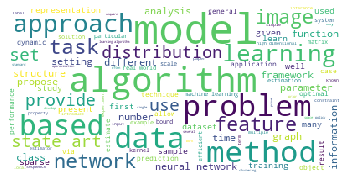

In [9]:
# Word cloud
from os import path
# from PIL import Image
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# wordcloud = WordCloud(background_color='white', stopwords=stop_words,
#                      max_words=100, max_font_size=50, 
#                       random_state=42).generate(str(corpus))

wordcloud = WordCloud(background_color='white', max_words=100, max_font_size=50, 
                      random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()